In [1]:
!git clone https://github.com/ramybaly/Article-Bias-Prediction.git

xcode-select: note: no developer tools were found at '/Applications/Xcode.app', requesting install. Choose an option in the dialog to download the command line developer tools.


In [2]:
import pandas as pd
import json
from pathlib import Path

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from statistics import mean 

import string 

#Sklearn Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

#Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
json_path = '/content/Article-Bias-Prediction/data/jsons'
d = {}
cats = ['topic', 'source', 'bias']
it = []
pathlist = Path(json_path).rglob('*.json')
for path in pathlist:
     path_in_str = str(path)
     data = json.load(open(path_in_str))
     it = data.keys()
     print(data)
     break

{'topic': 'general_news', 'source': 'Fox Online News', 'bias': 2, 'url': 'http://www.foxnews.com/us/2016/02/17/apple-to-fight-order-to-help-hack-san-bernardino-shooters-phone.html?intcmp=hpbt1', 'title': "Apple to fight order to help hack San Bernardino shooter's phone", 'date': '2016-02-17', 'authors': '', 'content': "Apple will fight a federal magistrate 's order to help the Obama administration break into an encrypted iPhone belonging to one of the shooters in last December 's deadly San Bernardino terror attack .\nIn a statement posted on Apple 's website early Wednesday , CEO Tim Cook said the order by U.S. Magistrate Judge Sheri Pym `` has implications far beyond the legal case at hand . ''\n`` We have great respect for the professionals at the FBI , and we believe their intentions are good , '' Cook 's statement read in part . `` Up to this point , we have done everything that is both within our power and within the law to help them . But now the U.S. government has asked us for

In [5]:
it

dict_keys(['topic', 'source', 'bias', 'url', 'title', 'date', 'authors', 'content', 'content_original', 'source_url', 'bias_text', 'ID'])

In [6]:
df = pd.DataFrame(columns = it)

In [7]:
import nltk
from nltk.corpus import stopwords

In [8]:
dfList = []
pathlist = Path(json_path).rglob('*.json')
for path in pathlist:
     path_in_str = str(path)
     data = json.load(open(path_in_str))
     dfList.append(data)
     

In [9]:
df = pd.DataFrame(dfList)

In [10]:
df

,topic,source,bias,url,title,date,authors,content,content_original,source_url,bias_text,ID
0,general_news,Fox Online News,2,http://www.foxnews.com/us/2016/02/17/apple-to-...,Apple to fight order to help hack San Bernardi...,2016-02-17,,Apple will fight a federal magistrate 's order...,Apple will fight a federal magistrate's order ...,www.foxnews.com,right,SyqtmIJMvhJ0ZHmr
1,science,USA TODAY,1,http://www.usatoday.com/story/money/business/2...,Stanford breakthrough might triple battery life,2014-08-02,,Annoyed by how often your cellphone needs rech...,Wendy Koch\n\nUSA TODAY\n\nAnnoyed by how ofte...,www.usatoday.com,center,FBPS5SoveS3lSlJD
2,elections,CNN (Web News),0,http://www.cnn.com/2016/06/18/politics/orlando...,2016 campaign takes strange twists after Orlando,2016-06-18,Stephen Collinson,Washington ( CNN ) The ever-turbulent 2016 ele...,Washington (CNN) The ever-turbulent 2016 elect...,www.cnn.com,left,qbpqfwlNDBITA3jz
3,coronavirus,Vice,0,https://www.vice.com/en_us/article/4ag55g/repu...,Republicans Tried to Sneak Abortion Restrictio...,2020-03-13,,As lawmakers neared a deal on a coronavirus re...,As lawmakers neared a deal on a coronavirus re...,www.vice.com,left,WAA9NKwVmIJ6cu4A
4,supreme_court,PBS NewsHour,1,https://www.pbs.org/newshour/nation/lgbtq-advo...,LGBTQ advocates fear Kavanaugh’s votes on gay-...,2018-07-19,"Mark Sherman, Associated Press, Jennifer Peltz",WASHINGTON — Gay-rights supporters who thronge...,WASHINGTON — Gay-rights supporters who thronge...,www.pbs.org,center,rPiWlFYtIszGK6PY
...,...,...,...,...,...,...,...,...,...,...,...,...
37549,fiscal_cliff,ABC News,0,http://abcnews.go.com/blogs/politics/2012/12/f...,"At Edge of Ã¢â‚¬ËœCliff,Ã¢â‚¬â„¢ White House L...",,Sarah Parnass,With only days to come up with a deal to avoid...,With only days to come up with a deal to avoid...,www.abcnews.go.com,left,JEbhF0OI6GEjIJrx
37550,elections,Politico,0,http://www.politico.com/magazine/story/2016/11...,What It Took,2016-11-20,Michael Kruse,"In early 1979 , on a community access televisi...",Michael Kruse is a senior staff writer for Pol...,www.politico.com,left,Z8IxsABLGXUTsmy3
37551,defense,CNN (Web News),0,http://www.cnn.com/2012/11/13/politics/allen-i...,ISAF chief Gen. John Allen under investigation...,2012-11-13,,Story highlights Defense official : Allen has ...,Story highlights Defense official: Allen has d...,www.cnn.com,left,vHuzR5Eq55xIb2Wt
37552,banking_and_finance,CNN (Web News),0,https://money.cnn.com/2018/09/17/news/companie...,Coke could make a move into cannabis-infused d...,2018-09-17,Chris Isidore,Coca-Cola is considering a move into the growi...,Coca-Cola is considering a move into the growi...,www.money.cnn.com,left,xO0clR8wjJFhLlI2


In [ ]:
df.to_csv('cleaned_jsons')

In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
train.to_csv('NLP_train.csv')
test.to_csv('NLP_test.cv')

In [12]:
to_train = train[['bias', 'content','topic','source']]
to_train


,bias,content,topic,source
35959,0,"Washington ( CNN ) In this White House , no on...",white_house,CNN (Web News)
21362,2,"Jerry Falwell , Jr. , president of the evangel...",education,Reason
26635,2,Video of a fed up Trump supporter burning his ...,elections,Breitbart News
23589,2,President Trump said Friday that the U.S. was ...,north_korea,Washington Times
14989,2,A viral post from popular Instagram account @ ...,facts_and_fact_checking,The Dispatch
...,...,...,...,...
16850,1,WASHINGTON—President Trump bucked most of his ...,foreign_policy,Wall Street Journal - News
6265,0,Mr. Boehner had offered the president a defici...,fiscal_cliff,New York Times - News
11284,2,A federal judge temporarily blocked the implem...,abortion,Townhall
860,0,Three Americans perished in a terror attack on...,us_military,BET


In [15]:
to_test = test[['bias','content']]

In [13]:
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
import string

In [16]:
stop_words = set(stopwords.words('english'))
  
#Function for basic cleaning/preprocessing texts
def clean(doc):
    # Removal of punctuation marks (.,/\][{} etc) and numbers
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    # Removal of stopwords
    doc = " ".join([token for token in doc.split() if token not in stop_words])
    return doc.lower()

In [17]:
to_train['content'] = to_train['content'].apply(lambda x: clean(x))

<ipython-input-17-66b31e63e02e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_train['content'] = to_train['content'].apply(lambda x: clean(x))


In [18]:
to_test['content'] = to_test['content'].apply(lambda x: clean(x))

<ipython-input-18-a68057d39d21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_test['content'] = to_test['content'].apply(lambda x: clean(x))


In [ ]:
to_train

,bias,content,topic,source
35959,0,washington cnn in white house one knows ax fal...,white_house,CNN (Web News)
21362,2,jerry falwell jr president evangelical liberty...,education,Reason
26635,2,video fed trump supporter burning republican p...,elections,Breitbart News
23589,2,president trump said friday us taking new hard...,north_korea,Washington Times
14989,2,a viral post popular instagram account cloydri...,facts_and_fact_checking,The Dispatch
...,...,...,...,...
16850,1,washington—president trump bucked top national...,foreign_policy,Wall Street Journal - News
6265,0,mr boehner offered president deficit framework...,fiscal_cliff,New York Times - News
11284,2,a federal judge temporarily blocked implementa...,abortion,Townhall
860,0,three americans perished terror attack militar...,us_military,BET


In [19]:
vect = CountVectorizer(max_features= 5000, preprocessor=clean)
X_train_dtm = vect.fit_transform(to_train['content'])
X_val_dtm = vect.transform(to_test['content'])

print(X_train_dtm.shape, X_val_dtm.shape)

(30043, 5000) (7511, 5000)


In [20]:
y_train,y_test = to_train['bias'], to_test['bias']

In [21]:
training, training_labels = X_train_dtm, to_train['bias']
testing, testing_labels = X_val_dtm, to_test['bias']

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=500)
scores = cross_val_score(clf, training, training_labels, cv=5)


In [23]:
scores.mean()

0.6364876453628479

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf=RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, training, training_labels, cv=5)
scores.mean()
#clf.fit(training, training_labels)


0.5472492991537993

In [ ]:
print (clf.score(training, training_labels))
print(clf.score(testing, testing_labels))

0.999966714376061
0.6466515776860604


In [25]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, training, training_labels, cv=5)
scores.mean()
#clf.fit(training, training_labels)

0.5132642636134569

In [ ]:
# Number of trees in random forest
n_estimators = np.linspace(100, 3000, int((3000-100)/200) + 1, dtype=int)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 5, 10, 20, 50, 75, 100, 150, 200]
# Minimum number of samples required to split a node
# min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]
min_samples_split = [1, 2, 5, 10, 15, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion=['gini', 'entropy']
random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_base = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 5, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = 4)
rf_random.fit(training, training_labels)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
!git clone https://github.com/mmihaltz/word2vec-GoogleNews-vectors.git

Cloning into 'word2vec-GoogleNews-vectors'...
remote: Enumerating objects: 20, done.
remote: Total 20 (delta 0), reused 0 (delta 0), pack-reused 20
Unpacking objects: 100% (20/20), done.


In [ ]:
!gzip -d GoogleNews-vectors-negative300.bin

gzip: GoogleNews-vectors-negative300.bin: unknown suffix -- ignored


In [26]:
!pip install lime transformers 
## for data
import json
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for processing
import re
import nltk
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
## for explainer
from lime import lime_text
## for word embedding
import gensim
import gensim.downloader as gensim_api
## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
## for bert language model
import transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 4.3 MB/s 
     |████████████████████████████████| 5.8 MB 42.5 MB/s 
     |████████████████████████████████| 7.6 MB 49.4 MB/s 
     |████████████████████████████████| 182 kB 52.5 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=c7c58132a0be3734eec98676dd74e3fa11a50e140e27bfc86686c621763066c5
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [27]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):

    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [28]:
import re
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [29]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [30]:
lst_stopwords = nltk.corpus.stopwords.words("english")
to_train["text_clean"] = to_train["content"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))
to_train.head()

<ipython-input-30-ff38d00ffa3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_train["text_clean"] = to_train["content"].apply(lambda x:


,bias,content,topic,source,text_clean
35959,0,washington cnn in white house one knows ax fal...,white_house,CNN (Web News),washington cnn white house one know ax fall sw...
21362,2,jerry falwell jr president evangelical liberty...,education,Reason,jerry falwell jr president evangelical liberty...
26635,2,video fed trump supporter burning republican p...,elections,Breitbart News,video fed trump supporter burning republican p...
23589,2,president trump said friday us taking new hard...,north_korea,Washington Times,president trump said friday u taking new hardl...
14989,2,a viral post popular instagram account cloydri...,facts_and_fact_checking,The Dispatch,viral post popular instagram account cloydrive...


In [31]:
## split dataset
dtf_train, dtf_test = model_selection.train_test_split(to_train, test_size=0.3)
## get target
y_train = dtf_train["bias"].values
y_test = dtf_test["bias"].values

In [32]:
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))

In [33]:
corpus = dtf_train["text_clean"]
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [34]:
from sklearn import feature_selection
bias = dtf_train["bias"]
X_names = vectorizer.get_feature_names()
p_value_limit = 0.95
dtf_features = pd.DataFrame()
for cat in np.unique(bias):
    chi2, p = feature_selection.chi2(X_train, bias==cat)
    dtf_features = dtf_features.append(pd.DataFrame(
                   {"feature":X_names, "score":1-p, "bias":cat}))
    dtf_features = dtf_features.sort_values(["bias"])
X_names = dtf_features["feature"].unique().tolist()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [35]:
for cat in np.unique(bias):
   print("# {}:".format(cat))
   print("  . selected features:",
         len(dtf_features[dtf_features["bias"]==cat]))
   print("  . top features:", ",".join(
dtf_features[dtf_features["bias"]==cat]["feature"].values[:10]))
   print(" ")

# 0:
  . selected features: 10000
  . top features: aaron,press secretary,pressed,pressing,pressure,pressured,presidential run,pressuring,presumptive,pretend
 
# 1:
  . selected features: 10000
  . top features: abandoned,abandoning,abbott,abc,abuse power,abc news,abdullah,ability,abedin,abide
 
# 2:
  . selected features: 10000
  . top features: press conference,press fda,press release,press secretary,pressed,pressing,pressure,presumptive,pressuring,presumably
 


In [47]:
vectorizer = feature_extraction.text.TfidfVectorizer(vocabulary=X_names)
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [ ]:
classifier = naive_bayes.MultinomialNB()


In [ ]:
## pipeline
model = pipeline.Pipeline([("vectorizer", vectorizer),  
                           ("classifier", classifier)])
## train classifier
model["classifier"].fit(X_train, y_train)
## test
X_test = dtf_test["text_clean"].values
predicted = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)

Accuracy: 0.55
Auc: 0.74
Detail:
              precision    recall  f1-score   support

           0       0.54      0.60      0.57      3107
           1       0.55      0.42      0.48      2560
           2       0.57      0.61      0.59      3346

    accuracy                           0.55      9013
   macro avg       0.55      0.55      0.55      9013
weighted avg       0.55      0.55      0.55      9013



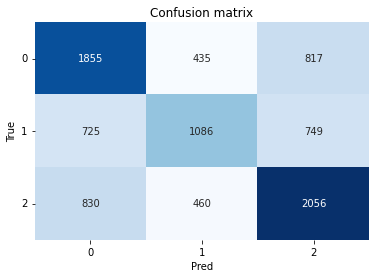

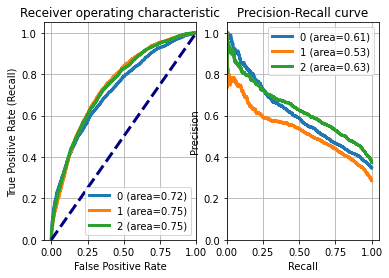

In [ ]:
from sklearn import metrics
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

In [40]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
model_RF = pipeline.Pipeline([("vectorizer", vectorizer),  
                           ("classifier", clf)])
model_RF["classifier"].fit(X_train, y_train)
X_test = dtf_test["text_clean"].values
predicted = model_RF.predict(X_test)
predicted_prob = model_RF.predict_proba(X_test)

Accuracy: 0.52
Auc: 0.7
Detail:
              precision    recall  f1-score   support

           0       0.50      0.59      0.54      3057
           1       0.53      0.45      0.49      2641
           2       0.54      0.51      0.52      3315

    accuracy                           0.52      9013
   macro avg       0.52      0.52      0.52      9013
weighted avg       0.52      0.52      0.52      9013



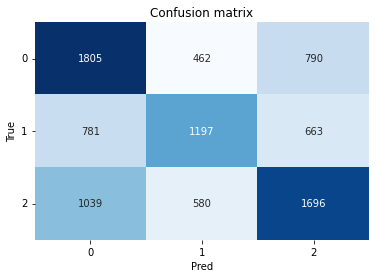

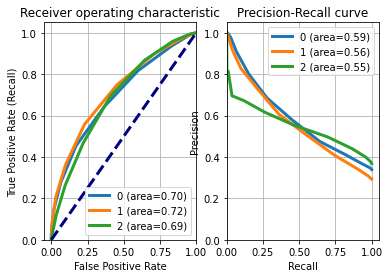

In [41]:
from sklearn import metrics
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

In [49]:
clf_ada = AdaBoostClassifier(n_estimators=500)
model_ada = pipeline.Pipeline([("vectorizer", vectorizer),  
                           ("classifier", clf_ada)])
model_ada["classifier"].fit(X_train, y_train)
X_test = dtf_test["text_clean"].values
predicted = model_ada.predict(X_test)
predicted_prob = model_ada.predict_proba(X_test)

Accuracy: 0.65
Auc: 0.81
Detail:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      3057
           1       0.68      0.63      0.66      2641
           2       0.65      0.68      0.67      3315

    accuracy                           0.65      9013
   macro avg       0.66      0.65      0.65      9013
weighted avg       0.66      0.65      0.65      9013



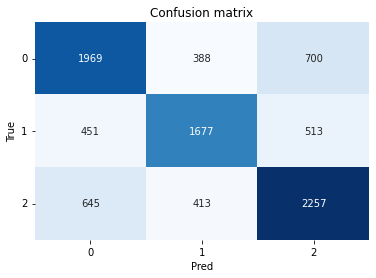

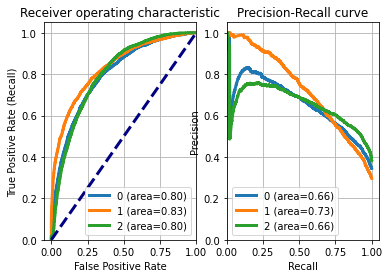

In [50]:
from sklearn import metrics
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

In [46]:
predicted, predicted_prob

(array([1, 0, 1, ..., 2, 0, 2]), array([[0.3, 0.4, 0.3],
        [0.8, 0.2, 0. ],
        [0.2, 0.6, 0.2],
        ...,
        [0.2, 0.3, 0.5],
        [0.4, 0.3, 0.3],
        [0.3, 0.1, 0.6]]))

In [52]:
## select observation
i = 0
txt_instance = dtf_test["content"].iloc[i]
## check true value and predicted value
print("True:", y_test[i], "--> Pred:", predicted[i], "| Prob:", round(np.max(predicted_prob[i]),2))
## show explanation
explainer = lime_text.LimeTextExplainer(class_names=
             np.unique(y_train))
explained = explainer.explain_instance(txt_instance, 
             model_ada.predict_proba, num_features=3)
explained.show_in_notebook(text=txt_instance, predict_proba=False)

True: 2 --> Pred: 2 | Prob: 0.33


In [53]:
## select observation
i = 0
txt_instance = dtf_test["content"].iloc[i]
## check true value and predicted value
print("True:", y_test[i], "--> Pred:", predicted[i], "| Prob:", round(np.max(predicted_prob[i]),2))
## show explanation
explainer = lime_text.LimeTextExplainer(class_names=
             np.unique(y_train))
explained = explainer.explain_instance(txt_instance, 
             model_RF.predict_proba, num_features=3)
explained.show_in_notebook(text=txt_instance, predict_proba=False)

True: 2 --> Pred: 2 | Prob: 0.33


In [ ]:
nlp = gensim_api.load("word2vec-google-news-300")

[=================================================-] 99.8% 1660.0/1662.8MB downloaded


In [ ]:
corpus = dtf_train["text_clean"]

## create list of lists of unigrams
lst_corpus = []
for string in corpus:
   lst_words = string.split()
   lst_grams = [" ".join(lst_words[i:i+1]) 
               for i in range(0, len(lst_words), 1)]
   lst_corpus.append(lst_grams)

## detect bigrams and trigrams
bigrams_detector = gensim.models.phrases.Phrases(lst_corpus, 
                 delimiter=" ".encode(), min_count=5, threshold=10)
bigrams_detector = gensim.models.phrases.Phraser(bigrams_detector)
trigrams_detector = gensim.models.phrases.Phrases(bigrams_detector[lst_corpus], 
            delimiter=" ".encode(), min_count=5, threshold=10)
trigrams_detector = gensim.models.phrases.Phraser(trigrams_detector)

In [ ]:
nlp = gensim.models.word2vec.Word2Vec(lst_corpus, size=200,   
            window=8, min_count=1, sg=1, iter=10)

<ipython-input-35-a834b89cab0c>:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  nlp.most_similar(word, topn=20)]
<ipython-input-35-a834b89cab0c>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = nlp[tot_words]
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

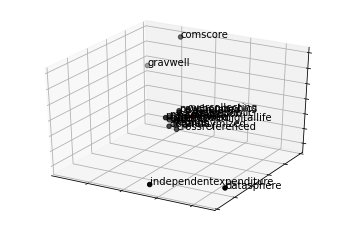

In [ ]:
word = "data"
fig = plt.figure()
## word embedding
tot_words = [word] + [tupla[0] for tupla in 
                 nlp.most_similar(word, topn=20)]
X = nlp[tot_words]
## pca to reduce dimensionality from 300 to 3
pca = manifold.TSNE(perplexity=40, n_components=3, init='pca')
X = pca.fit_transform(X)
## create dtf
dtf_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"])
dtf_["input"] = 0
dtf_["input"].iloc[0:1] = 1
## plot 3d
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dtf_[dtf_["input"]==0]['x'], 
           dtf_[dtf_["input"]==0]['y'], 
           dtf_[dtf_["input"]==0]['z'], c="black")
ax.scatter(dtf_[dtf_["input"]==1]['x'], 
           dtf_[dtf_["input"]==1]['y'], 
           dtf_[dtf_["input"]==1]['z'], c="red")
ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], 
       yticklabels=[], zticklabels=[])
for label, row in dtf_[["x","y","z"]].iterrows():
    x, y, z = row
    ax.text(x, y, z, s=label)

In [ ]:
## tokenize text
tokenizer = kprocessing.text.Tokenizer(lower=True, split=' ', 
                     oov_token="NaN", 
                     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(lst_corpus)
dic_vocabulary = tokenizer.word_index
## create sequence
lst_text2seq= tokenizer.texts_to_sequences(lst_corpus)
## padding sequence
X_train = kprocessing.sequence.pad_sequences(lst_text2seq, 
                    maxlen=15, padding="post", truncating="post")

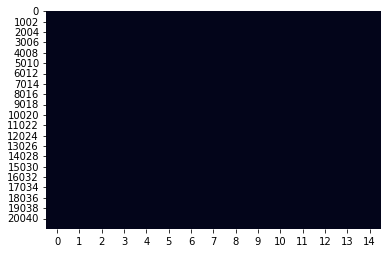

In [ ]:
sns.heatmap(X_train==0, vmin=0, vmax=1, cbar=False)
plt.show()

In [ ]:
i = 0

## list of text: ["I like this", ...]
len_txt = len(dtf_train["text_clean"].iloc[i].split())
print("from: ", dtf_train["text_clean"].iloc[i], "| len:", len_txt)

## sequence of token ids: [[1, 2, 3], ...]
len_tokens = len(X_train[i])
print("to: ", X_train[i], "| len:", len(X_train[i]))

## vocabulary: {"I":1, "like":2, "this":3, ...}
print("check: ", dtf_train["text_clean"].iloc[i].split()[0], 
      " -- idx in vocabulary -->", 
      dic_vocabulary[dtf_train["text_clean"].iloc[i].split()[0]])

print("vocabulary: ", dict(list(dic_vocabulary.items())[0:5]), "... (padding element, 0)")

from:  washington cnn nation elite conservative donor split republican voter support president keeping many leading moneyman sideline campaign barrel summer quarter top conservative donor decided exclusively support one white house hopeful according cnn analysis super pac filing posted friday splintered field presidential candidate hold commanding lead record reveal clearest term yet financier made decision like casino magnate sheldon adelson party top giver cut check republican candidate allied group others like houston texan owner bob mcnair donated simultaneously many four aspirant spreading money around field nobody clearly ahead said jay bergman top republican donor given sparingly super pac courted past six month emerges lot people going commit month formally announced bid potential candidate courted contributor lavish resort oneonone visit weekend five republican hopeful travel dana point woo network donor organized charles david koch two country richest american donated candida

In [ ]:
corpus = dtf_test["text_clean"]

## create list of n-grams
lst_corpus = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, 
                 len(lst_words), 1)]
    lst_corpus.append(lst_grams)
    
## detect common bigrams and trigrams using the fitted detectors
lst_corpus = list(bigrams_detector[lst_corpus])
lst_corpus = list(trigrams_detector[lst_corpus])
## text to sequence with the fitted tokenizer
lst_text2seq = tokenizer.texts_to_sequences(lst_corpus)

## padding sequence
X_test = kprocessing.sequence.pad_sequences(lst_text2seq, maxlen=15,
             padding="post", truncating="post")

In [ ]:
## start the matrix (length of vocabulary x vector size) with all 0s
embeddings = np.zeros((len(dic_vocabulary)+1, 300))
for word,idx in dic_vocabulary.items():
    ## update the row with vector
    try:
        embeddings[idx] =  nlp[word]
    ## if word not in model then skip and the row stays all 0s
    except:
        pass

<ipython-input-40-9112dbec5449>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  embeddings[idx] =  nlp[word]


In [ ]:
## code attention layer
def attention_layer(inputs, neurons):
    x = layers.Permute((2,1))(inputs)
    x = layers.Dense(neurons, activation="softmax")(x)
    x = layers.Permute((2,1), name="attention")(x)
    x = layers.multiply([inputs, x])
    return x

## input
x_in = layers.Input(shape=(15,))
## embedding
x = layers.Embedding(input_dim=embeddings.shape[0],  
                     output_dim=embeddings.shape[1], 
                     weights=[embeddings],
                     input_length=15, trainable=False)(x_in)
## apply attention
x = attention_layer(x, neurons=15)
## 2 layers of bidirectional lstm
x = layers.Bidirectional(layers.LSTM(units=15, dropout=0.2, 
                         return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(units=15, dropout=0.2))(x)
## final dense layers
x = layers.Dense(64, activation='relu')(x)
y_out = layers.Dense(3, activation='softmax')(x)
## compile
model = models.Model(x_in, y_out)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 15)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 15, 300)      38629800    ['input_1[0][0]']                
                                                                                                  
 permute (Permute)              (None, 300, 15)      0           ['embedding[0][0]']              
                                                                                                  
 dense (Dense)                  (None, 300, 15)      240         ['permute[0][0]']                
                                                                                              

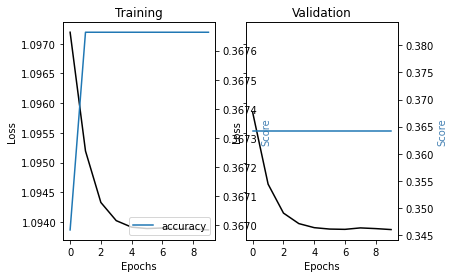

In [ ]:
## encode y
dic_y_mapping = {n:label for n,label in 
                 enumerate(np.unique(y_train))}
inverse_dic = {v:k for k,v in dic_y_mapping.items()}
y_train = np.array([inverse_dic[y] for y in y_train])
## train
training = model.fit(x=X_train, y=y_train, batch_size=256, 
                     epochs=10, shuffle=True, verbose=0, 
                     validation_split=0.3)
## plot loss and accuracy
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:
    ax11.plot(training.history[metric], label=metric)
ax11.set_ylabel("Score", color='steelblue')
ax11.legend()
ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
     ax22.plot(training.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")
plt.show()

In [ ]:
predicted_prob = model.predict(X_test)
predicted = [dic_y_mapping[np.argmax(pred)] for pred in 
             predicted_prob]

282/282 [==============================] - 5s 12ms/step


In [ ]:
## select observation
i = 0
txt_instance = dtf_test["content"].iloc[i]
## check true value and predicted value
print("True:", y_test[i], "--> Pred:", predicted[i], "| Prob:", round(np.max(predicted_prob[i]),2))

## show explanation
### 1. preprocess input
lst_corpus = []
for string in [re.sub(r'[^\w\s]','', txt_instance.lower().strip())]:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, 
                 len(lst_words), 1)]
    lst_corpus.append(lst_grams)
lst_corpus = list(bigrams_detector[lst_corpus])
lst_corpus = list(trigrams_detector[lst_corpus])
X_instance = kprocessing.sequence.pad_sequences(
              tokenizer.texts_to_sequences(corpus), maxlen=15, 
              padding="post", truncating="post")
### 2. get attention weights
layer = [layer for layer in model.layers if "attention" in 
         layer.name][0]
func = K.function([model.input], [layer.output])
weights = func(X_instance)[0]
print(len(weights))
weights = np.mean(weights, axis=2).flatten()
print(len(weights))
### 3. rescale weights, remove null vector, map word-weight
weights = preprocessing.MinMaxScaler(feature_range=(0,1)).fit_transform(np.array(weights).reshape(-1,1)).reshape(-1)
print(len(weights))
weights = [weights[n] for n,idx in enumerate(X_instance[0]) if idx 
           != 0]
dic_word_weigth = {}
print(len(weights))
print("corpus",len(lst_corpus[0]))
for n, word in enumerate(lst_corpus[0]):
  if word in tokenizer.word_index.keys():
    print("word", word)
    print("n", n)
    dic_word_weigth[word] = weights[n]
                  
### 5. produce html visualization
text = []
for word in lst_corpus[0]:
    weight = dic_word_weigth.get(word)
    if weight is not None:
         text.append('<b><span style="background-color:rgba(100,149,237,' + str(weight) + ');">' + word + '</span></b>')
    else:
         text.append(word)
text = ' '.join(text)
### 6. visualize on notebook
print("\033[1m"+"Text with highlighted words")
from IPython.core.display import display, HTML
display(HTML(text))

True: 2 --> Pred: 2 | Prob: 0.37
9013
135195
135195
15
corpus 381
word as
n 0
word prepares
n 2
word head
n 3
word colorado
n 4
word wednesday
n 5
word legislation
n 7
word calling
n 8
word key
n 10
word statistic
n 11
word using
n 12
word tout
n 13
word message
n 14
word nearuniversal
n 15


IndexError: ignored

In [ ]:
## select observation
i = 0
txt_instance = dtf_test["content"].iloc[i]
## check true value and predicted value
print("True:", y_test[i], "--> Pred:", predicted[i], "| Prob:", round(np.max(predicted_prob[i]),2))

## show explanation
### 1. preprocess input
lst_corpus = []
for string in [re.sub(r'[^\w\s]','', txt_instance.lower().strip())]:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, 
                 len(lst_words), 1)]
    lst_corpus.append(lst_grams)
lst_corpus = list(bigrams_detector[lst_corpus])
lst_corpus = list(trigrams_detector[lst_corpus])
X_instance = kprocessing.sequence.pad_sequences(
              tokenizer.texts_to_sequences(corpus), maxlen=15, 
              padding="post", truncating="post")
### 2. get attention weights
layer = [layer for layer in model.layers if "attention" in 
         layer.name][0]
func = K.function([model.input], [layer.output])
weights = func(X_instance)[0]
weights = np.mean(weights, axis=2).flatten()
### 3. rescale weights, remove null vector, map word-weight
weights = preprocessing.MinMaxScaler(feature_range=(0,1)).fit_transform(np.array(weights).reshape(-1,1)).reshape(-1)
weights = [weights[n] for n,idx in enumerate(X_instance[0]) if idx 
           != 0]
dic_word_weigth = {word:weights[n] for n,word in 
                   enumerate(lst_corpus[0]) if word in 
                   tokenizer.word_index.keys()}
### 4. barplot
if len(dic_word_weigth) > 0:
   dtf = pd.DataFrame.from_dict(dic_word_weigth, orient='index', 
                                columns=["score"])
   dtf.sort_values(by="score", 
           ascending=True).tail(3).plot(kind="barh", 
           legend=False).grid(axis='x')
   plt.show()
else:
   print("--- No word recognized ---")
### 5. produce html visualization
text = []
for word in lst_corpus[0]:
    weight = dic_word_weigth.get(word)
    if weight is not None:
         text.append('<b><span style="background-color:rgba(100,149,237,' + str(weight) + ');">' + word + '</span></b>')
    else:
         text.append(word)
text = ' '.join(text)
### 6. visualize on notebook
print("\033[1m"+"Text with highlighted words")
from IPython.core.display import display, HTML
display(HTML(text))

True: 2 --> Pred: 2 | Prob: 0.37


IndexError: ignored

In [ ]:
tokenizer = transformers.AutoTokenizer.from_pretrained('distilbert-base-uncased', do_lower_case=True)

In [ ]:
corpus = dtf_train["content"]
maxlen = 50

## add special tokens
maxqnans = np.int((maxlen-20)/2)
corpus_tokenized = ["[CLS] "+
             " ".join(tokenizer.tokenize(re.sub(r'[^\w\s]+|\n', '', 
             str(txt).lower().strip()))[:maxqnans])+
             " [SEP] " for txt in corpus]

## generate masks
masks = [[1]*len(txt.split(" ")) + [0]*(maxlen - len(
           txt.split(" "))) for txt in corpus_tokenized]
    
## padding
txt2seq = [txt + " [PAD]"*(maxlen-len(txt.split(" "))) if len(txt.split(" ")) != maxlen else txt for txt in corpus_tokenized]
    
## generate idx
idx = [tokenizer.encode(seq.split(" ")) for seq in txt2seq]
    
## generate segments
segments = [] 
for seq in txt2seq:
    temp, i = [], 0
    for token in seq.split(" "):
        temp.append(i)
        if token == "[SEP]":
             i += 1
    segments.append(temp)
## feature matrix
X_train = [np.asarray(idx, dtype='int32'), 
           np.asarray(masks, dtype='int32'), 
           np.asarray(segments, dtype='int32')]